##### Importing Packages

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')
np.random.seed(4292020)

##### Customers RFM Data

In [2]:
customers = pd.read_csv(r'C:\Users\gpskc\customers_rfm.csv')
customers.set_index("CustomerID",inplace=True)
customers.describe()

# Recency   = Days since recent transaction
# Frequency = Number of unique transactions
# Monetary  = Avg of Quarterly Gross Margin

# Neglog Transformation: if x <= 0 then -ln(1-x) else ln(1+x)

# Scaling for Recency: 1 + 9*[max(xi)-xi]/[max(xi)-min(xi)]
# Scaling for  Others: 1 + 9*[xi-min(xi)]/[max(xi)-min(xi)]

# Rating (1-10 scale) = 0.5*Recency + 0.3*Frequency + 0.2*Monetary
# Score(1-1000 scale) = 100*Rating

,Recency,Frequency,Monetary,Recency_Neglog,Frequency_Neglog,Monetary_Neglog,Recency_Scaled,Frequency_Scaled,Monetary_Scaled
count,4111.000000,4111.000000,4111.000000,4111.000000,4111.000000,4111.000000,4111.000000,4111.000000,4111.000000
mean,697.344928,128.445147,0.101129,6.510735,3.857554,0.092358,6.850593,4.419365,4.644190
std,197.161450,334.173802,0.111543,0.272116,1.343320,0.096657,2.709208,1.451552,0.861662
min,489.000000,1.000000,-0.372220,6.194405,0.693147,-0.316430,1.000000,1.000000,1.000000
25%,512.000000,19.000000,0.035507,6.240276,2.995732,0.034891,3.957878,3.488105,4.131892
50%,598.000000,45.000000,0.091330,6.395262,3.828641,0.087398,8.000260,4.388122,4.599970
75%,898.000000,113.500000,0.156402,6.801283,4.740565,0.145314,9.543310,5.373520,5.116270
max,1209.000000,8283.000000,1.000000,7.098376,9.022081,0.693147,10.000000,10.000000,10.000000


##### Raw RFM Distribution

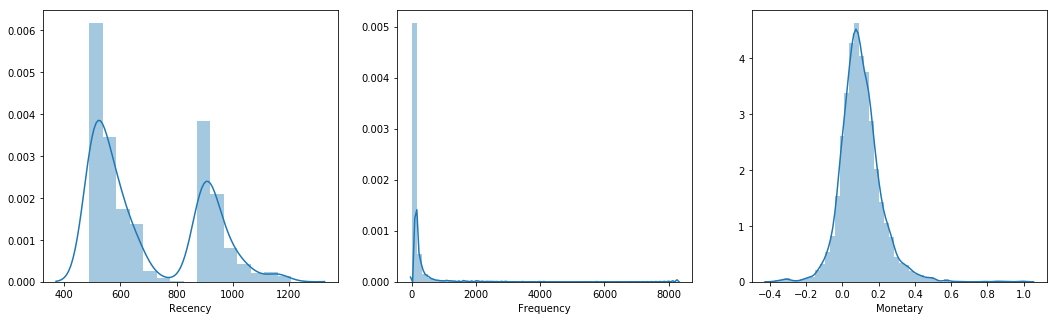

In [3]:
fig,axes = plt.subplots(1,3,figsize=(18,5))
sns.distplot(customers.Recency,ax=axes[0])
sns.distplot(customers.Frequency,ax=axes[1])
sns.distplot(customers.Monetary,ax=axes[2])
plt.show()

##### Neglog RFM Distribution

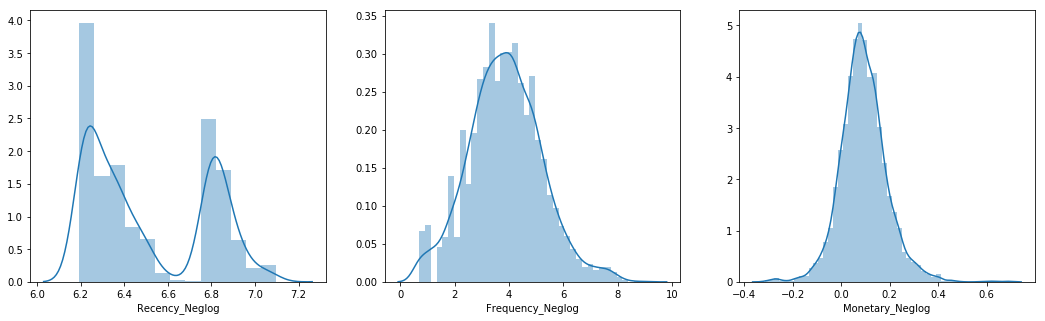

In [4]:
fig,axes = plt.subplots(1,3,figsize=(18,5))
sns.distplot(customers.Recency_Neglog,ax=axes[0])
sns.distplot(customers.Frequency_Neglog,ax=axes[1])
sns.distplot(customers.Monetary_Neglog,ax=axes[2])
plt.show()

##### Scaled RFM Distribution

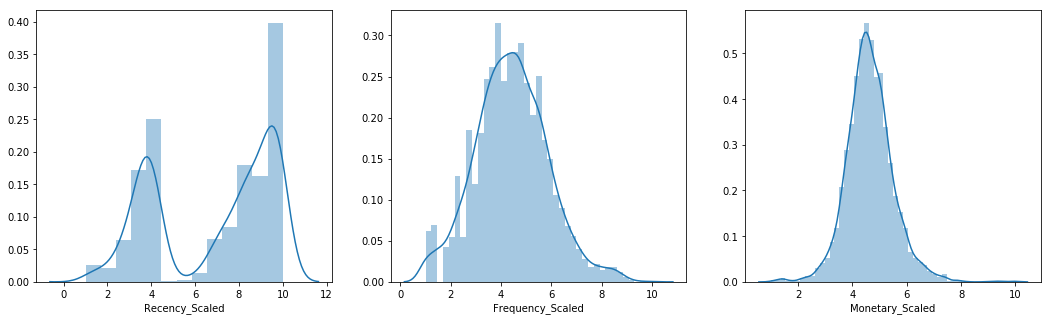

In [5]:
fig,axes = plt.subplots(1,3,figsize=(18,5))
sns.distplot(customers.Recency_Scaled,ax=axes[0])
sns.distplot(customers.Frequency_Scaled,ax=axes[1])
sns.distplot(customers.Monetary_Scaled,ax=axes[2])
plt.show()

##### K-Means Silhouette Analysis

For n_clusters = 3 The average silhouette_score is : 0.4316357492557256


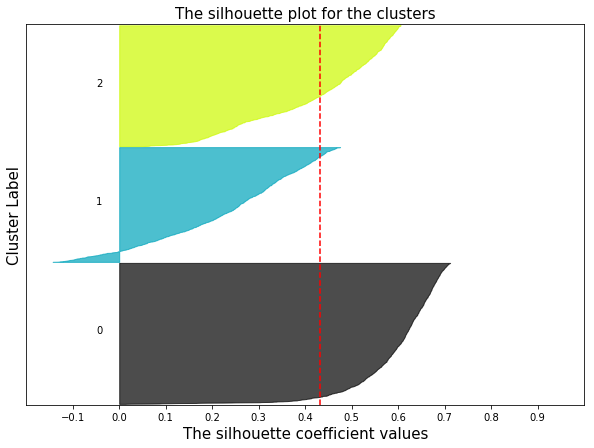

In [6]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples,silhouette_score

X = customers.iloc[:,-3:]
range_n_clusters = [3]

for n_clusters in range_n_clusters:
    fig,ax = plt.subplots(1,1)
    fig.set_size_inches(10,7)
    ax.set_xlim([-0.2,1])
    ax.set_ylim([0,len(X)+(n_clusters+1)*10])
    clusterer = KMeans(n_clusters=n_clusters,random_state=4292020)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X,cluster_labels)
    print("For n_clusters =",n_clusters,"The average silhouette_score is :",silhouette_avg)
    sample_silhouette_values = silhouette_samples(X,cluster_labels)
    
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower+size_cluster_i

        color = cm.nipy_spectral(float(i)/n_clusters)
        ax.fill_betweenx(np.arange(y_lower,y_upper),0,ith_cluster_silhouette_values,facecolor=color,edgecolor=color,alpha=0.7)
        ax.text(-0.05,y_lower+(0.5*size_cluster_i),str(i))
        y_lower = y_upper+10

    ax.set_title("The silhouette plot for the clusters",size=15)
    ax.set_xlabel("The silhouette coefficient values",size=15)
    ax.set_ylabel("Cluster Label",size=15)
    ax.axvline(x=silhouette_avg,color="red",linestyle="--")
    ax.set_yticks([])
    ax.set_xticks(np.arange(-0.1,1,0.1))

plt.show()

For n_clusters = 3 The average silhouette_score is : 0.4316357492557256


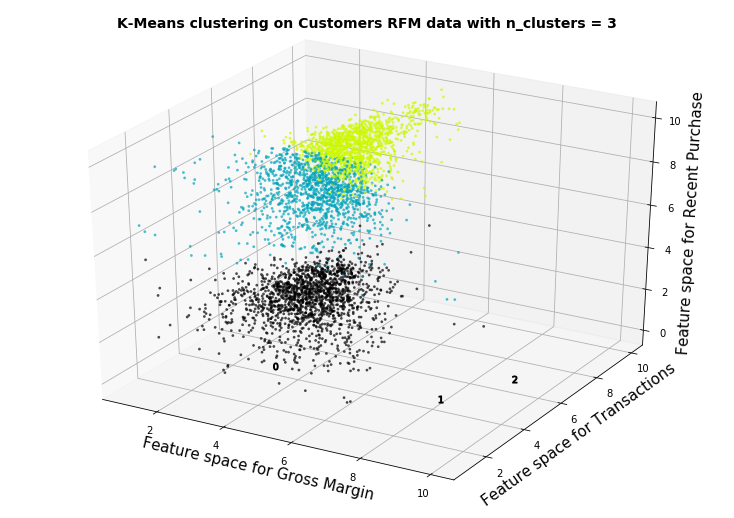

In [7]:
from mpl_toolkits.mplot3d import Axes3D

for n_clusters in range_n_clusters:
    fig,ax = plt.subplots(1,1)
    ax = Axes3D(fig)

    fig.set_size_inches(10,7)
    clusterer = KMeans(n_clusters=n_clusters,random_state=4292020)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X,cluster_labels)
    print("For n_clusters =",n_clusters,"The average silhouette_score is :",silhouette_avg)
    sample_silhouette_values = silhouette_samples(X,cluster_labels)

    colors = cm.nipy_spectral(cluster_labels.astype(float)/n_clusters)
    ax.scatter(X.iloc[:,-1],X.iloc[:,-2],X.iloc[:,-3],marker='.',s=30,lw=0,alpha=0.7,c=colors,edgecolor='k')
    centers = clusterer.cluster_centers_

    for i,c in enumerate(centers): ax.scatter(c[0],c[1],marker='$%d$' % i,alpha=1,s=50,edgecolor='k')
    ax.set_xlabel("Feature space for Gross Margin",size=15)
    ax.set_ylabel("Feature space for Transactions",size=15)
    ax.set_zlabel('Feature space for Recent Purchase',size=15)
    plt.suptitle(("K-Means clustering on Customers RFM data with n_clusters = %d" % n_clusters),fontsize=14,fontweight='bold')
plt.show()

In [8]:
customers_clusters = X.copy()
customers_clusters['Cluster'] = KMeans(n_clusters=3,random_state=4292020).fit_predict(X)
customers_final = customers.iloc[:,:3].join(customers_clusters)
customers_final.sort_index(inplace=True)
customers_final

,Recency,Frequency,Monetary,Recency_Scaled,Frequency_Scaled,Monetary_Scaled,Cluster
CustomerID,,,,,,,
12346,721,2,-0.157168,6.140827,1.438134,2.519535,1
12347,510,193,0.072591,9.582201,5.943297,4.445567,2
12348,501,31,-0.003168,9.759115,3.995977,3.792652,1
12349,890,69,0.140687,4.046871,4.841804,4.994288,0
12350,637,33,-0.034184,7.372263,4.061487,3.521206,1
12352,589,72,0.088249,8.150985,4.887149,4.574760,1
12353,571,8,0.198758,8.459460,2.625262,5.436949,1
12354,558,105,0.282938,8.688345,5.290180,6.041960,2
12355,540,12,0.174155,9.014210,3.022614,5.252082,1


In [9]:
customers_final.to_csv('customers_clusters.csv')